# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [30]:
df_test = pd.read_csv('./data/data.csv')


df_test.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [19]:
# Mapping untuk Ethnicity
ethnicity_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Mapping untuk ParentalEducation
education_mapping = {
    0: 'None',
    1: 'High School',
    2: 'Some College',
    3: "Bachelor's",
    4: 'Higher'
}

# Terapkan mapping ke masing-masing kolom
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_mapping)
df['ParentalEducation'] = df['ParentalEducation'].map(education_mapping)

In [20]:
# Mapping untuk kolom
tutoring_mapping = {0: 'No', 1: 'Yes'}
parental_support_mapping = {
    0: 'None',
    1: 'Low',
    2: 'Moderate',
    3: 'High',
    4: 'Very High'
}
binary_mapping = {0: 'No', 1: 'Yes'}

# Terapkan mapping
df['Tutoring'] = df['Tutoring'].map(tutoring_mapping)
df['ParentalSupport'] = df['ParentalSupport'].map(parental_support_mapping)
df['Extracurricular'] = df['Extracurricular'].map(binary_mapping)
df['Sports'] = df['Sports'].map(binary_mapping)
df['Music'] = df['Music'].map(binary_mapping)
df['Volunteering'] = df['Volunteering'].map(binary_mapping)

In [21]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,0,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,0,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,1,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,1,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


In [22]:
df.to_csv('./data/data_clean.csv', index=False)

In [23]:
df_clean = pd.read_csv('./data/data_clean.csv')

df_clean.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,0,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,0,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,1,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,1,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [32]:
#Type your code here
df = pd.read_csv('./data/student_performances.csv')

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,2.0
1,1002,18,0,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,1.0
2,1003,15,0,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,4.0
3,1004,17,1,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,3.0
4,1005,17,1,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,4.0


In [33]:
print(f"Jumlah Data: {df.shape}")
print(f"Column Data: {df.columns}")
print(f"Jumlah Kolom: {len(df.columns)}")

Jumlah Data: (2392, 15)
Column Data: Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')
Jumlah Kolom: 15


**Insight**: Data ini memiliki 2392 baris dan 15 kolom. Terdapat kolom `StudentID`, `Age`, `Gender`, `Ethnicity`, `ParentalEducation`, `StudyTimeWeekly`, `Absesnces`, `Toturing`, `ParentalSupport`, `Extracurricular`, `Sports`, `Music`, `Volunteering`, `GPA`, dan `GradeClass`

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [34]:
# Check structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2149 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   object 
 8   ParentalSupport    2180 non-null   object 
 9   Extracurricular    2392 non-null   object 
 10  Sports             2392 non-null   object 
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(4), object(8)
memory usage: 280.4+ KB


**Insight**: 
- Dataset terdiri dari 2392 baris dan 15 kolom.
- Terdapat `5 kolom` bertipe numerik, dan `10 kolom` bertipe kategorikal
- Contoh kolom kategorikal: `Gender`, `Ethnicity`, `ParentalEducation`, `GradeClass`
- Contoh kolom numerik: `Age`, `StudyTimeWeekly`, `Absences`, `GPA`


### **2. Menangani Data yang Hilang**

In [36]:
missing_data = df[df.isnull().any(axis=1)]
missing_data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
8,1009,17,0,Caucasian,NaN,4.562008,1,No,Moderate,No,Yes,No,Yes,2.896819,2.0
15,1016,15,0,Caucasian,Some College,9.728101,17,Yes,NaN,No,Yes,No,No,1.341521,4.0
17,1018,18,1,Caucasian,NaN,3.528238,16,Yes,Moderate,No,No,No,No,1.384404,4.0
22,1023,16,1,African American,NaN,18.648880,29,Yes,Low,No,No,No,No,0.312546,4.0
28,1029,18,0,Caucasian,NaN,18.679748,10,No,High,Yes,No,No,No,2.854804,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,3367,16,1,Caucasian,Some College,6.959373,17,No,NaN,No,No,No,No,0.984294,2.0
2376,3377,17,1,Asian,Some College,14.667230,3,No,NaN,Yes,No,No,No,2.928219,1.0
2377,3378,18,0,Caucasian,Some College,12.749976,8,Yes,NaN,Yes,Yes,No,No,2.652355,2.0
2381,3382,15,0,Asian,NaN,10.095086,5,No,High,No,No,No,No,2.956255,0.0


In [28]:
# Identifikasi data yang hilang
missing_data = df_clean.isnull().sum()
missing_data = missing_data[missing_data > 0]
missing_data_percentage = (missing_data / len(df_clean)) * 100

# Tampilkan jumlah dan persentase data yang hilang
missing_data_df = pd.DataFrame({'Jumlah Data Hilang': missing_data, 'Persentase Data Hilang (%)': missing_data_percentage})
print(missing_data_df)

                   Jumlah Data Hilang  Persentase Data Hilang (%)
ParentalEducation                 243                   10.158863
ParentalSupport                   212                    8.862876


**Insight**: Terdapat beberapa misiing values pada kolom `ParentalEducation`, dan `ParentalSupport`. Dilihat dari datanya, kita bisa mengisi kategori 'Unknown' pada missing values tersebut.

### **3. Analisis Distribusi dan Korelasi**

In [43]:
# Analisis statistik deskriptif untuk variabel numerik
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
df[numerical_columns].describe()

,Age,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,1.906186
std,1.123798,5.652774,8.467417,0.915156
min,15.000000,0.001057,0.000000,0.000000
25%,15.000000,5.043079,7.000000,1.174803
50%,16.000000,9.705363,15.000000,1.893393
75%,17.000000,14.408410,22.000000,2.622216
max,18.000000,19.978094,29.000000,4.000000


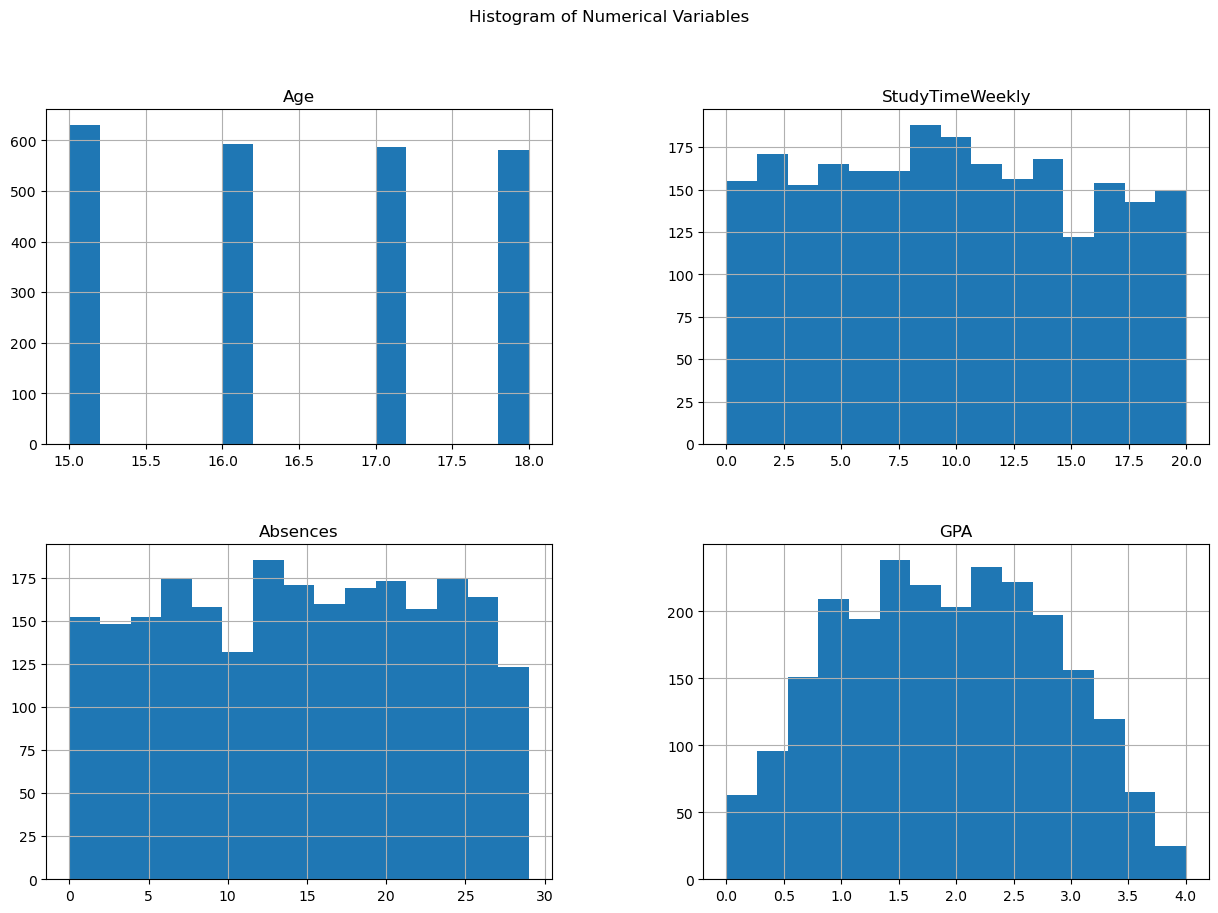

In [42]:
# Visualisasi histogram untuk variabel numerik
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Histogram of Numerical Variables')
plt.show()

**Insight**: 
Dari histogram variabel numerik dalam gambar tersebut, kita bisa mendapatkan beberapa insight sebagai berikut:

1. **Age**:
Distribusi usia cukup merata di rentang 15 hingga 18 tahun. Tidak ada usia yang mendominasi secara signifikan.

2. **StudyTimeWeekly**:
Waktu belajar mingguan tampaknya cukup merata dari 0 hingga 20 jam, meskipun ada beberapa fluktuasi dan sedikit puncak di sekitar 10 hingga 15 jam.

3. **Absences**:
Ketidakhadiran bervariasi dengan distribusi yang hampir merata antara 0 hingga 30 kali absen. Tidak ada pola yang jelas terlihat pada data absensi.

4. **GPA**:
Distribusi GPA menyerupai kurva normal di mana sebagian besar nilai berkumpul di sekitar angka 2,0 hingga 3,0. Ini menunjukkan bahwa mayoritas siswa memiliki GPA rata-rata.

Secara keseluruhan, tidak ada pola yang terlalu mencolok di setiap variabel kecuali distribusi GPA yang menunjukkan kecenderungan normal.

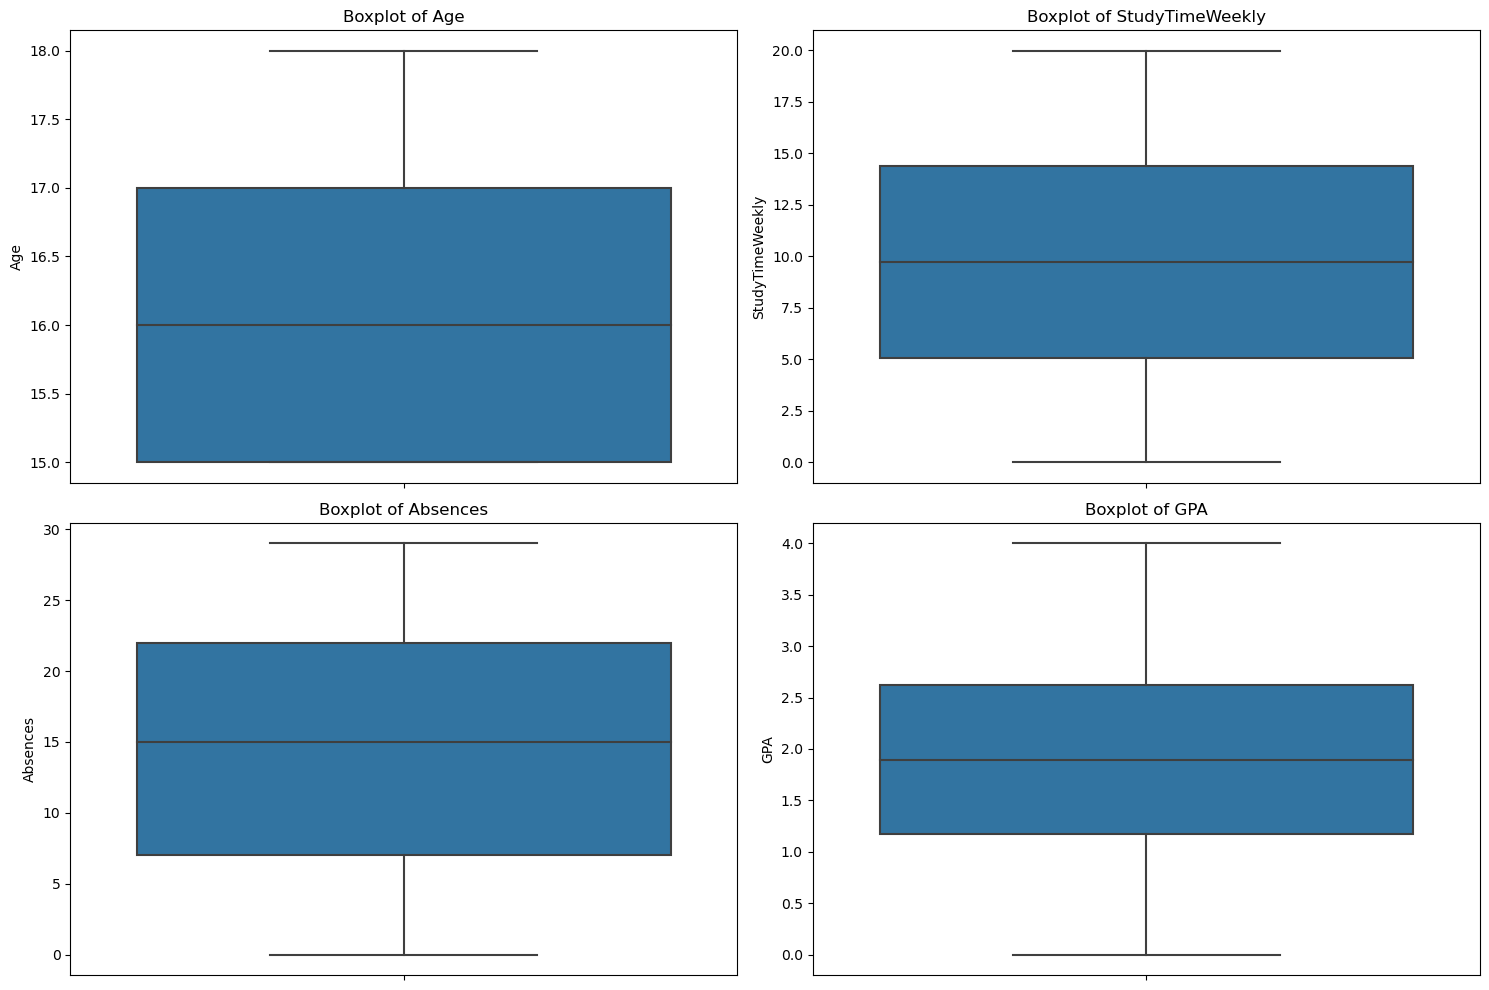

In [44]:
# Visualisasi boxplot untuk variabel numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

Dari boxplot variabel numerik dalam gambar tersebut, kita dapat memperoleh beberapa wawasan:

1. **Age**:
   - Tidak ada outlier yang terlihat.
   - Usia median adalah sekitar 16 tahun.

2. **StudyTimeWeekly**:
   - Waktu belajar mingguan berkisar antara 0 hingga 20 jam.
   - Tidak ada outlier signifikan yang terlihat.

3. **Absences**:
   - Ketidakhadiran bervariasi dari 0 hingga 30 kali.
   - Median ketidakhadiran adalah sekitar 15 kali.
   - Tidak ada outlier yang mencolok, menunjukkan distribusi yang cukup stabil.

4. **GPA**:
   - Rentang GPA adalah dari 0 hingga 4.
   - Median GPA adalah sekitar 2,5.
   - Tidak ada outlier, distribusi GPA terlihat simetris.

Secara keseluruhan, boxplot ini menunjukkan bahwa tidak ada variabel yang memiliki outlier yang ekstrem, dan distribusi data cukup merata dan simetris, khususnya untuk GPA.

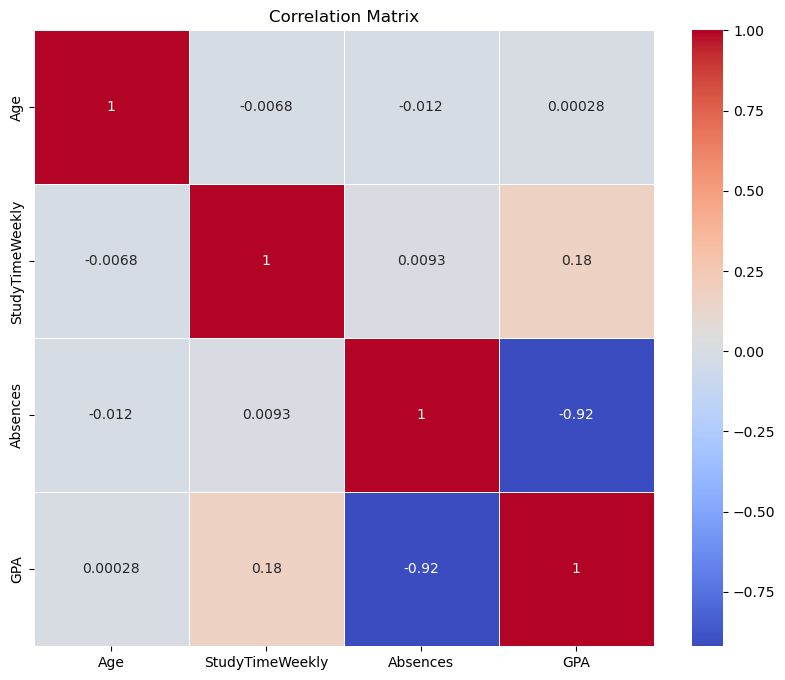

In [47]:
# Matriks Korelasi
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Dari matriks korelasi dalam gambar tersebut, beberapa wawasan penting dapat diambil:

1. **Age**:
   - Usia memiliki korelasi yang sangat lemah dengan variabel lainnya, menunjukkan bahwa usia tidak memiliki banyak pengaruh pada variabel-variabel lain dalam data ini.

2. **StudyTimeWeekly**:
   - Memiliki korelasi positif yang lemah dengan GPA (\(0.18\)), yang berarti ada sedikit hubungan antara peningkatan waktu belajar dan peningkatan GPA.

3. **Absences**:
   - Memiliki korelasi yang sangat tinggi dan negatif dengan GPA (\(-0.92\)), menunjukkan hubungan yang kuat bahwa semakin banyak ketidakhadiran, maka GPA cenderung lebih rendah.

4. **GPA**:
   - Sejalan dengan di atas, GPA sangat dipengaruhi oleh jumlah absensi, tetapi dipengaruhi secara lemah oleh waktu belajar dan usia.

Keseluruhan, temuan utama adalah bahwa jumlah ketidakhadiran memiliki pengaruh yang sangat kuat dan negatif terhadap GPA, sedangkan waktu belajar memiliki pengaruh yang lebih ringan tetapi positif pada GPA.

### **4. Visualisasi Data**

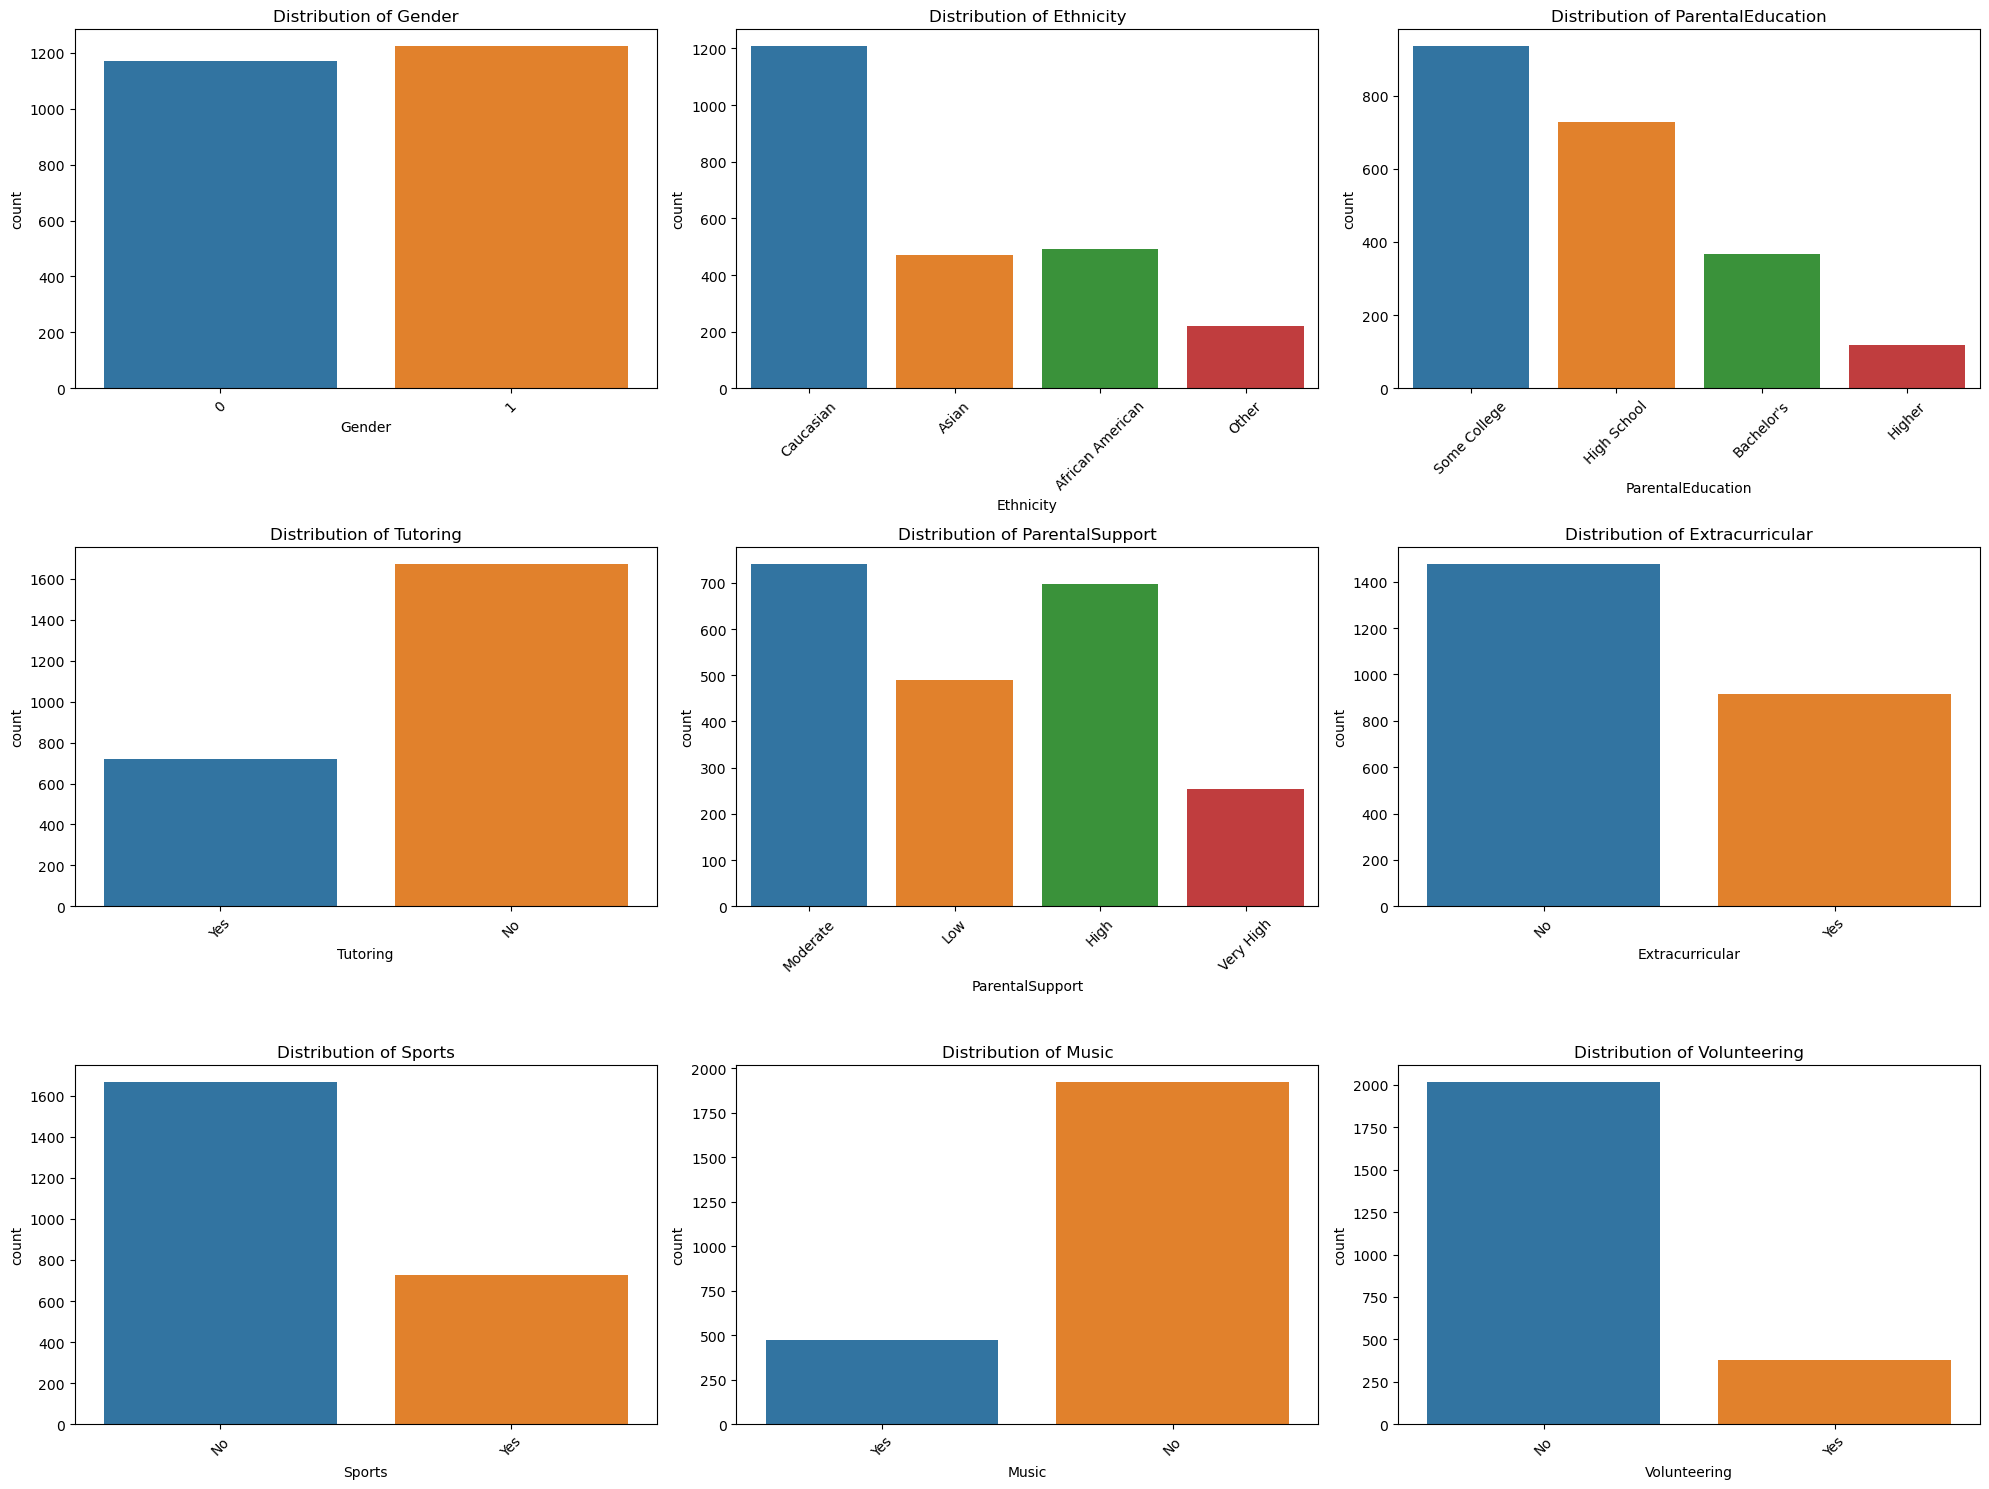

In [50]:
# Visualisasi distribusi untuk variabel kategorikal
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.